<a href="https://colab.research.google.com/github/debojit11070/deep-learning/blob/main/Face_musk_Detection_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !pip install kaggle


**Workflow**
1. dataset:

 a. people wearing mask

 b. people not wearing mask

2. image processing

 a. resizing the images

 b. converting the images into numpy arrays

3. Split into training and test data

4. Feed the Data to CNN

5. Evaluate the model




In [ ]:
# configuring the path of kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Importing the face mask dataset**


In [ ]:
# API to fetch the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

100% 163M/163M [00:08<00:00, 21.2MB/s]
100% 163M/163M [00:08<00:00, 19.5MB/s]


In [ ]:
## extracting the compress dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("the dataset is extracted")

the dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3316.jpg', 'with_mask_984.jpg', 'with_mask_1480.jpg', 'with_mask_1935.jpg', 'with_mask_1688.jpg']
['with_mask_3026.jpg', 'with_mask_2591.jpg', 'with_mask_2271.jpg', 'with_mask_2939.jpg', 'with_mask_754.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1835.jpg', 'without_mask_2695.jpg', 'without_mask_3728.jpg', 'without_mask_2566.jpg', 'without_mask_400.jpg']
['without_mask_1778.jpg', 'without_mask_1842.jpg', 'without_mask_3121.jpg', 'without_mask_947.jpg', 'without_mask_3294.jpg']


In [ ]:
print('number of with mask images: ', len(with_mask_files))
print('number of without mask images: ', len(without_mask_files))

number of with mask images:  3725
number of without mask images:  3828


**Creating labels for two classes of images**

with mask = 1

without mask = 0

In [ ]:
with_mask_labels = [1]*len(with_mask_files)
without_mask_labels = [0]*len(without_mask_files)

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
labels = with_mask_labels + without_mask_labels
len(labels)

7553

**Display an image**

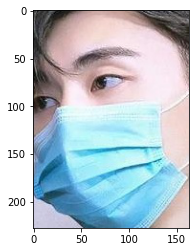

In [ ]:
##with mask
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

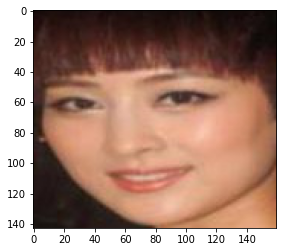

In [ ]:
## without mask

img = mpimg.imread('/content/data/without_mask/without_mask_2990.jpg')
imgplot = plt.imshow(img)
plt.show()

**image processing**

1. Resize the images

2. convert the images to numpy arrays

In [ ]:
## converting images to numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


In [ ]:
type(data)

In [ ]:
len(data)

In [ ]:
data[0]

In [ ]:
data[0].shape

In [ ]:
# converting image list and label list to numpy arrays
x = np.array(data)
y = np.array(labels)

In [ ]:
x.shape

In [ ]:
x

In [ ]:
y

In [ ]:
y.shape

**Train Test Split**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
print(x.shape, xtrain.shape, xtest.shape, ytest.shape)

In [ ]:
## scalling the data
xtrain_scaled = xtrain/255
xtest_scaled = xtest/255


In [ ]:
xtrain[0]

In [ ]:
xtest_scaled[0]

In [ ]:
xtrain_scaled[0]

**Building the convulational neural networks (cnn)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))


In [ ]:
## compile the neural network
model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
## training the neural network
history = model.fit(xtrain_scaled, ytrain, validation_split=0.1, epochs=5)

In [ ]:
xtest_scaled.shape

In [ ]:
ytest.shape

In [ ]:
loss, accuracy = model.evaluate(xtest_scaled, ytest)
print('Test Accuracy =', accuracy)

In [ ]:
h = history